# 视频会员订单数据分析

数据清洗是数据分析中非常重要的步骤，进行数据清洗，通常需要四个步骤：
- 读取文件，预处理数据集
- 识别并处理【缺失值】
- 识别并处理【异常值】
- 识别并处理【重复值】

## 数据清洗

In [2]:
# 导入模块
import pandas as pd

# 读取路径"视频会员订单数据源.csv"的文件
df = pd.read_csv("lesson2-dataset/视频会员订单数据源.csv")

# 商品价格price，单位分转化成元
df['price'] = df['price'] /100

# 订单创建时间create_time和支付时间pay_time，转化成时间格式
df['create_time'] = pd.to_datetime(df['create_time'])
df['pay_time'] = pd.to_datetime(df['pay_time'])

# 处理缺失值
# 删除payment_provider这一列缺失值的行
dfPayNull = df[df['payment_provider'].isnull()]
df.drop(index=dfPayNull.index, inplace = True)

# 删除platform这一列缺失值的行
dfPlatNull = df[df['platform'].isnull()]
df.drop(index=dfPlatNull.index,inplace = True)

# 处理异常值
# 删除price这一列不是25.00，68.00，248.00的异常值
dfWrongPrice = df[~df['price'].isin([25.00,68.00,248.00])]
df.drop(index=dfWrongPrice.index,inplace = True)

# 删除支付时间pay_time小于创建时间create_time的异常值
dfWrongTime = df[df['pay_time'] < df['create_time']]
df.drop(index = dfWrongTime.index ,inplace=True)

# 处理重复值
# 删除order_id这一列的重复值
dfOrderDu = df[df['order_id'].duplicated()]
df.drop(index = dfOrderDu.index, inplace = True)

## 数据分析

### 可视化代码如下

首先需要完成绘图的准备工作：
1. 使用pandas模块读取文件
2. 导入matplotlib.pyplot模块
3. 设置字体

接着，使用plt.plot()函数绘制折线图，需要将必选参数x轴和y轴对应的值依次传入到该函数中。

最后，使用plt.show()函数把折线图展示出来即可。

"每个月购买会员的人数"，Yoyo细分三种不同的会员，进行了分析和可视化

<Figure size 432x288 with 0 Axes>

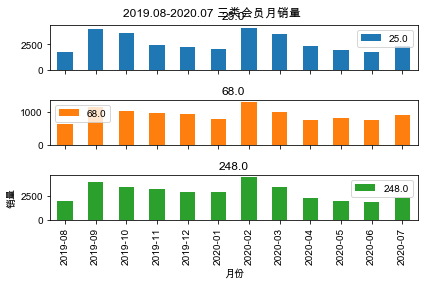

<Figure size 432x288 with 0 Axes>

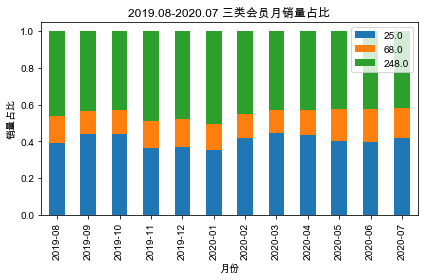

In [3]:
# 导入模块
import pandas as pd

# 读取路径"/Users/clean/视频会员订单数据源.csv"的文件
df = pd.read_csv("lesson2-dataset/视频会员订单数据源.csv")

# 商品价格price，单位分转化成元
df['price'] = df['price'] /100

# 订单创建时间create_time和支付时间pay_time，转化成时间格式
df['create_time'] = pd.to_datetime(df['create_time'])
df['pay_time'] = pd.to_datetime(df['pay_time'])

# 处理缺失值
# 删除payment_provider这一列缺失值的行
dfPayNull = df[df['payment_provider'].isnull()]
df.drop(index=dfPayNull.index, inplace = True)

# 删除platform这一列缺失值的行
dfPlatNull = df[df['platform'].isnull()]
df.drop(index=dfPlatNull.index,inplace = True)

# 处理异常值
# 删除price这一列不是25.00，68.00，248.00的异常值
dfWrongPrice = df[~df['price'].isin([25.00,68.00,248.00])]
df.drop(index=dfWrongPrice.index,inplace = True)

# 删除支付时间pay_time小于创建时间create_time的异常值
dfWrongTime = df[df['pay_time'] < df['create_time']]
df.drop(index = dfWrongTime.index ,inplace=True)

# 处理重复值
# 删除order_id这一列的重复值
dfOrderDu = df[df['order_id'].duplicated()]
df.drop(index = dfOrderDu.index, inplace = True)


# 可视化
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

df = df.set_index("create_time")
data = df['order_id'].groupby(df["price"]).resample("M").count()
data = data.unstack("price")
data.index = data.index.strftime('%Y-%m')
plt.figure(1)
data.plot.bar(subplots=True, title = "2019.08-2020.07 三类会员月销量")
plt.xlabel("月份")
plt.ylabel("销量")

plt.legend()
plt.tight_layout()
plt.show()

sumNum = data.sum(axis=1)
def getPercentage(item):
    return item / sumNum[item.index]
datapercent = data.apply(getPercentage)
plt.figure(2)
datapercent.plot.bar(stacked=True, title = "2019.08-2020.07 三类会员月销量占比")
plt.xlabel("月份")
plt.ylabel("销量占比")
plt.legend()
plt.tight_layout()
plt.show()

针对“购买了一次月度会员/季度会员的用户，是否会继续购买会员。”
对会员是否继续购买会员做了一个统计

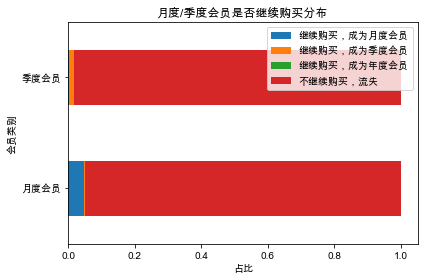

In [4]:
# 导入模块
import pandas as pd

# 读取路径"/Users/clean/视频会员订单数据源.csv"的文件
df = pd.read_csv("lesson2-dataset/视频会员订单数据源.csv")

# 商品价格price，单位分转化成元
df['price'] = df['price'] /100

# 订单创建时间create_time和支付时间pay_time，转化成时间格式
df['create_time'] = pd.to_datetime(df['create_time'])
df['pay_time'] = pd.to_datetime(df['pay_time'])

# 处理缺失值
# 删除payment_provider这一列缺失值的行
dfPayNull = df[df['payment_provider'].isnull()]
df.drop(index=dfPayNull.index, inplace = True)

# 删除platform这一列缺失值的行
dfPlatNull = df[df['platform'].isnull()]
df.drop(index=dfPlatNull.index,inplace = True)

# 处理异常值
# 删除price这一列不是25.00，68.00，248.00的异常值
dfWrongPrice = df[~df['price'].isin([25.00,68.00,248.00])]
df.drop(index=dfWrongPrice.index,inplace = True)

# 删除支付时间pay_time小于创建时间create_time的异常值
dfWrongTime = df[df['pay_time'] < df['create_time']]
df.drop(index = dfWrongTime.index ,inplace=True)

# 处理重复值
# 删除order_id这一列的重复值
dfOrderDu = df[df['order_id'].duplicated()]
df.drop(index = dfOrderDu.index, inplace = True)


# 可视化
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

df_next = {"月度会员":[1453, 85, 34, 28649],"季度会员":[21, 175, 2, 10584]}
index_next = ["继续购买，成为月度会员","继续购买，成为季度会员","继续购买，成为年度会员","不继续购买，流失"]

df = pd.DataFrame(df_next , index = index_next)
sumNum = df.sum()
df = df / sumNum
datapercent = pd.DataFrame(df.values.T, index=df.columns, columns=df.index)

datapercent.plot.barh(stacked=True, title = "月度/季度会员是否继续购买分布")
plt.xlabel("占比")
plt.ylabel("会员类别")
plt.legend(loc = "upper right")
plt.tight_layout()

plt.show()

从订单数据中，交叉分析，制作了以下图表：各类型的会员，在平台和支付渠道的分布

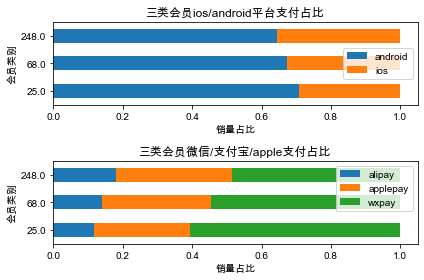

In [5]:
# 导入模块
import pandas as pd

# 读取路径"/Users/clean/视频会员订单数据源.csv"的文件
df = pd.read_csv("lesson2-dataset/视频会员订单数据源.csv")

# 商品价格price，单位分转化成元
df['price'] = df['price'] /100

# 订单创建时间create_time和支付时间pay_time，转化成时间格式
df['create_time'] = pd.to_datetime(df['create_time'])
df['pay_time'] = pd.to_datetime(df['pay_time'])

# 处理缺失值
# 删除payment_provider这一列缺失值的行
dfPayNull = df[df['payment_provider'].isnull()]
df.drop(index=dfPayNull.index, inplace = True)

# 删除platform这一列缺失值的行
dfPlatNull = df[df['platform'].isnull()]
df.drop(index=dfPlatNull.index,inplace = True)

# 处理异常值
# 删除price这一列不是25.00，68.00，248.00的异常值
dfWrongPrice = df[~df['price'].isin([25.00,68.00,248.00])]
df.drop(index=dfWrongPrice.index,inplace = True)

# 删除支付时间pay_time小于创建时间create_time的异常值
dfWrongTime = df[df['pay_time'] < df['create_time']]
df.drop(index = dfWrongTime.index ,inplace=True)

# 处理重复值
# 删除order_id这一列的重复值
dfOrderDu = df[df['order_id'].duplicated()]
df.drop(index = dfOrderDu.index, inplace = True)


# 可视化
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

# 三类会员ios/android平台支付占比
data = df["order_id"].groupby([df["price"],df["platform"]]).count()
data = data.unstack("platform")
sumNum = data.sum(axis=1)
def getPercentage(item):
    return item / sumNum[item.index]
datapercent = data.apply(getPercentage)
datapercent.plot.barh(stacked=True, title = "三类会员ios/android平台支付占比", ax = plt.subplot(211))
plt.xlabel("销量占比")
plt.ylabel("会员类别")
plt.legend()
plt.tight_layout()


# 三类会员微信、支付宝、苹果支付占比
data = df["order_id"].groupby([df["price"],df["payment_provider"]]).count()
data = data.unstack("payment_provider")
sumNum = data.sum(axis=1)
def getPercentage(item):
    return item / sumNum[item.index]
datapercent = data.apply(getPercentage)
datapercent.plot.barh(stacked=True, title = "三类会员微信/支付宝/apple支付占比", ax = plt.subplot(212))
plt.xlabel("销量占比")
plt.ylabel("会员类别")
plt.legend()
plt.tight_layout()

plt.show()